In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1FSgBA1EuOP125dve-DwXFV8J6cSb-TBvZNVjJ7bCdOA/edit#gid=1696779641'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df1 = pd.read_csv(sheet_url_trf, parse_dates=['order_purchase_timestamp'])

sheet_url2 = 'https://docs.google.com/spreadsheets/d/18l-V0GnXLMaavlHae6A8Pg8nMvu6lZSdTiPfdlBgWLE/edit#gid=2120215191'
sheet_url_trf2 = sheet_url2.replace('/edit#gid=', '/export?format=csv&gid=')
df2 = pd.read_csv(sheet_url_trf2)

sheet_url3 = 'https://docs.google.com/spreadsheets/d/1kQJHcb6VILWltYLVpbGvqXJQV8r86qCFckxQQo79x54/edit#gid=1579038503'
sheet_url_trf3 = sheet_url3.replace('/edit#gid=', '/export?format=csv&gid=')
df3 = pd.read_csv(sheet_url_trf3)



In [ ]:
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 0:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 0:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 0:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 0:00:00


In [ ]:
df1['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


the number of Na -> 2965

about 3% from total data.

We decided to drop every row with Na, since rows with Na means purchases has not been completed yet.

In [ ]:
dropped = [ 'canceled', 'unavailable']
dfx = df1.copy()
dfx = dfx[dfx['order_status'].isin(dropped) == False ]
dfx = dfx.dropna()

In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  object        
 5   order_delivered_carrier_date   96455 non-null  object        
 6   order_delivered_customer_date  96455 non-null  object        
 7   order_estimated_delivery_date  96455 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.6+ MB


In [ ]:
dfx['order_id']= pd.Series(dfx['order_id'], dtype = "string")
dfx['customer_id']= pd.Series(dfx['customer_id'], dtype = 'string')
dfx['order_status']= pd.Series(dfx['order_status'], dtype= 'string')



Interesting finding

In [ ]:
df_mix['customer_city'].unique()

<StringArray>
[              'sao paulo',               'barreiras',
              'vianopolis', 'sao goncalo do amarante',
             'santo andre',            'congonhinhas',
               'nilopolis',            'faxinalzinho',
                'sorocaba',          'rio de janeiro',
 ...
                'oiapoque',          'caldas brandao',
            'dias d avila',  'desterro de entre rios',
               'agua nova',                  'pacuja',
               'umburanas',         'messias targino',
        'campo do tenente',             'nova vicosa']
Length: 4084, dtype: string

Though the objective stated Gustavo is based in portugal, most of the customer_city here are fron Brazil. Who know whether it was a mistake in information or Gustavo just did a better job on Brazil

column 3-7 basically meant the same thing.
We decided to keep column 3 as we wanted to know when they made the purchase 

In [ ]:
dfx['order_purchase_timestamp'] = pd.to_datetime(dfx['order_purchase_timestamp'], format='%Y-%m-%d').dt.date
dfx['order_purchase_timestamp'] = pd.to_datetime(dfx['order_purchase_timestamp'], format='%Y-%m-%d')
dfx = dfx.iloc[ : , 0:4]
dfx

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08


In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96455 non-null  string        
 1   customer_id               96455 non-null  string        
 2   order_status              96455 non-null  string        
 3   order_purchase_timestamp  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](1), string(3)
memory usage: 3.7 MB


In [ ]:
dfx2 = df2.copy()
dfx3 = df3.copy()

In [ ]:
dfx2.info()
dfx3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null

In [ ]:
dfx3 = dfx3[dfx3['payment_type'] != 'not_defined']
dfx3['order_id']= pd.Series(dfx3['order_id'], dtype = "string")
dfx3['payment_type']= pd.Series(dfx3['payment_type'], dtype = 'string')

dfx2['customer_id']= pd.Series(dfx2['customer_id'], dtype = "string")
dfx2['customer_unique_id']= pd.Series(dfx2['customer_unique_id'], dtype = "string")
dfx2['customer_city']= pd.Series(dfx2['customer_city'], dtype = "string")
dfx2['customer_state']= pd.Series(dfx2['customer_state'], dtype = "string")

dfx2.info()

dfx3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  string
 1   customer_unique_id        99441 non-null  string
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  string
 4   customer_state            99441 non-null  string
dtypes: int64(1), string(4)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103883 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103883 non-null  string 
 1   payment_sequential    103883 non-null  int64  
 2   payment_type          103883 non-null  string 
 3   payment_installments  103883 non-null  int64  
 4   payment_value         103883 non-null 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Removing duplicates

In [ ]:
dfx = dfx[dfx.duplicated() != 'TRUE']
dfx2 = dfx2[dfx2.duplicated() != 'TRUE']
dfx3 = dfx3[dfx3.duplicated() != 'TRUE']

In case there was duplicate in Order Id, we will keep the last one assuming all the previous order id had some problems.

Duplicated order id

In [ ]:
df3[df3.duplicated(keep=False, subset = 'order_id')].sort_values(by=['order_id'])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
80833,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
101316,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
94666,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
86896,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
55842,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
...,...,...,...,...,...
5591,ffa1dd97810de91a03abd7bd76d2fed1,2,voucher,1,418.73
72946,ffa39020fe7c8a3e907320e1bec4b985,2,voucher,1,64.01
102791,ffa39020fe7c8a3e907320e1bec4b985,1,credit_card,1,7.13
102101,ffc730a0615d28ec19f9cad02cb41442,2,credit_card,1,12.63


In [ ]:
dfx3.drop_duplicates(subset ="order_id", keep = 'last', inplace = True)
dfx.drop_duplicates(subset ="order_id", inplace = True)


no not defined payment type

In [ ]:
dfx3[dfx3['payment_type'] == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value


no negative value

In [ ]:
dfx3[dfx3['payment_value']< 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [ ]:
dfx3 = dfx3[dfx3['payment_installments'] != 0]
dfx3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99435 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              99435 non-null  string 
 1   payment_sequential    99435 non-null  int64  
 2   payment_type          99435 non-null  string 
 3   payment_installments  99435 non-null  int64  
 4   payment_value         99435 non-null  float64
dtypes: float64(1), int64(2), string(2)
memory usage: 4.6 MB


checking for outlier

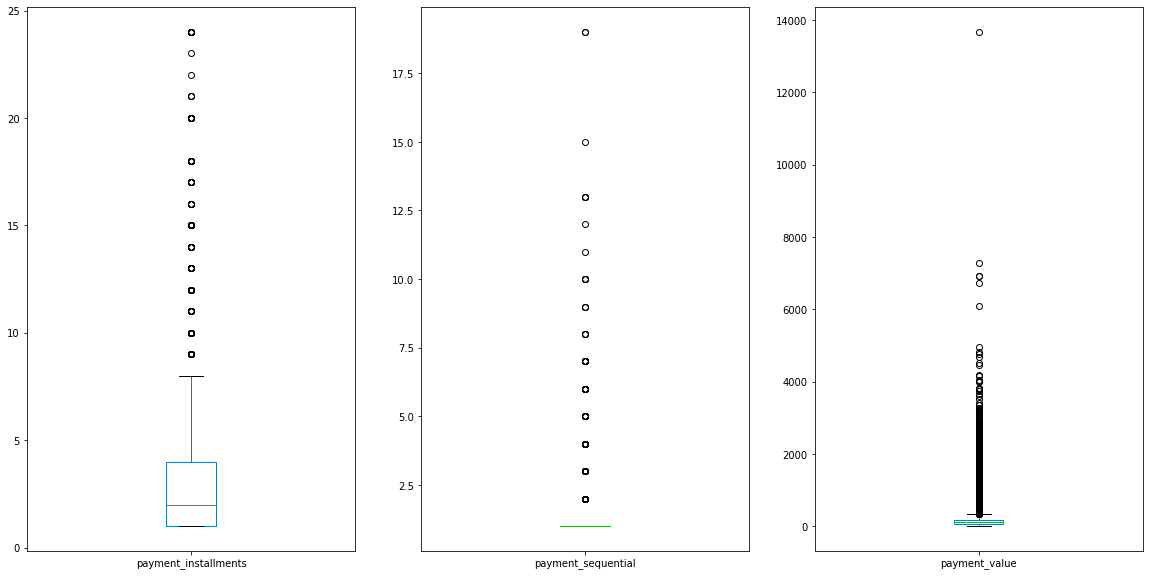

In [ ]:

numerical_column = ['payment_installments', 'payment_sequential', 'payment_value']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = dfx3.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

the payment installments and payments sequentials were not outliers since it was possible to have an up to 30 payment installments/sequentials. While for the payment value, we might consider looking for ouutliers

using hist to check the payment value

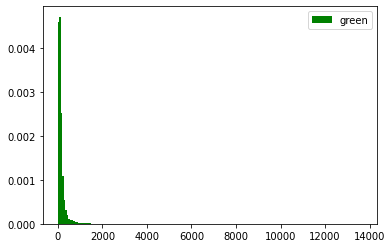

In [ ]:
n_bins = 200
x = dfx3['payment_value']
    
colors = ['green']
  
plt.hist(x, n_bins, density = True, 
         histtype ='bar',
         color = colors,
         label = colors)
  
plt.legend(prop ={'size': 10})
  
plt.show()

In [ ]:
Qmax = dfx3[['payment_value']].quantile(0.0005)
Qmin = dfx3[['payment_value']].quantile(0.9995)

print('Qmax:\n',Qmax)
print('\nQmin:\n',Qmin)

dfx3[dfx3['payment_value']> 2732]

Qmax:
 payment_value    0.301195
Name: 0.0005, dtype: float64

Qmin:
 payment_value    2732.520795
Name: 0.9995, dtype: float64


,order_id,payment_sequential,payment_type,payment_installments,payment_value
16,41b7766bb1df487d17fb9725b78ff509,1,boleto,1,3979.55
18,a53e05ecd2ed1f46a2b8e1f5828be7c6,1,credit_card,10,3826.80
19,d3f66901a6743e15f9311547cc623b91,1,credit_card,8,3792.59
20,fc20b8e282da6f3fbcdd3a3cedecb723,1,credit_card,10,3782.19
21,e85c92ee6a3ba1ef47e41c23286314d9,1,credit_card,10,3736.22
22,b15c7e972c74684414fb2e659fce916a,1,boleto,1,3666.42
23,df85c824523500d4066a0dbdb5d95bed,1,credit_card,1,3602.47
24,3a4b013e014723cc38c9faa8ffdc6387,1,credit_card,8,3526.46
25,43bdbd9dc0931d72befdf4765af6c442,1,boleto,1,3406.47
27,66b9c991ee308f9342f6a7f63bb68251,1,credit_card,5,3358.24


we will assume observations beyond the 99.95th or below 0.005 as outliers

In [ ]:
dfx3 = dfx3[dfx3['payment_value'] < 2732.520796]
dfx3 = dfx3[dfx3['payment_value'] > 0.301]

joining datasets

In [ ]:
df_cd = pd.merge(dfx, dfx3, how='inner', on = 'order_id')
df_cd
df_mix = pd.merge(df_cd,dfx2, how = 'inner', on = 'customer_id')
df_mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96339 entries, 0 to 96338
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96339 non-null  string        
 1   customer_id               96339 non-null  string        
 2   order_status              96339 non-null  string        
 3   order_purchase_timestamp  96339 non-null  datetime64[ns]
 4   payment_sequential        96339 non-null  int64         
 5   payment_type              96339 non-null  string        
 6   payment_installments      96339 non-null  int64         
 7   payment_value             96339 non-null  float64       
 8   customer_unique_id        96339 non-null  string        
 9   customer_zip_code_prefix  96339 non-null  int64         
 10  customer_city             96339 non-null  string        
 11  customer_state            96339 non-null  string        
dtypes: datetime64[ns](

In [ ]:
df_mix

,order_id,customer_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,1,credit_card,1,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,1,credit_card,1,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
96334,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
96335,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,1,credit_card,3,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
96336,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
96337,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


Exploring Data:

visualizing the timeseries data (simple line)

Checking mean median max min 

In [ ]:
numerical_column = ['payment_sequential','payment_installments','payment_value']
df_mix[numerical_column].describe()

,payment_sequential,payment_installments,payment_value
count,96339.000000,96339.000000,96339.000000
mean,1.019815,2.901068,153.888555
std,0.223381,2.697200,191.104208
min,1.000000,1.000000,0.310000
25%,1.000000,1.000000,59.000000
50%,1.000000,2.000000,102.560000
75%,1.000000,4.000000,173.820000
max,19.000000,24.000000,2732.060000


sales per state

In [ ]:
df_mix.groupby(['customer_state'])['payment_value'].agg(['count']).head(200)

,count
customer_state,
AC,80
AL,397
AM,145
AP,67
BA,3249
CE,1277
DF,2077
ES,1991
GO,1955


sales per month

In [ ]:
df_group_month = df_mix.groupby(df_mix['order_purchase_timestamp'].dt.strftime('%Y-%m'))['payment_value'].sum()
df_group_month_order = df_mix.groupby(df_mix['order_purchase_timestamp'].dt.strftime('%Y-%m'))['order_id'].count()

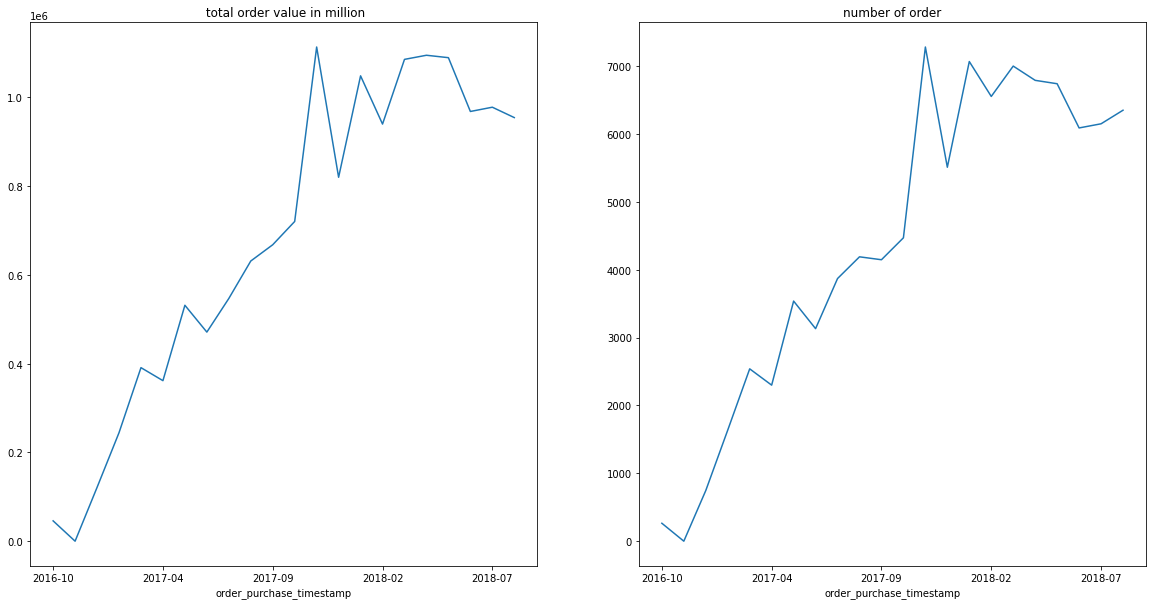

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
df_group_month.plot(ax=axes.flatten()[0],grid=False)
df_group_month_order.plot(ax=axes.flatten()[1],grid=False)
axes.flatten()[0].set_title(' total order value in million')
axes.flatten()[1].set_title('number of order')
plt.show()

Plot per year for better comparison

In [ ]:
df_mix2016 = df_mix[ df_mix['order_purchase_timestamp'] < '2017-01']
df_mix2017 = df_mix[ df_mix['order_purchase_timestamp'] < '2018-01']
df_mix2017 = df_mix2017[ df_mix2017['order_purchase_timestamp'] > '2016-12']
df_mix2018 = df_mix[ df_mix['order_purchase_timestamp'] < '2019-01']
df_mix2018 = df_mix2018[ df_mix2018['order_purchase_timestamp'] > '2017-12']

In [ ]:
df_group_month2016 = df_mix2016.groupby(df_mix2016['order_purchase_timestamp'].dt.strftime('%Y-%m'))['payment_value'].sum()
df_group_month_order2016 = df_mix2016.groupby(df_mix2016['order_purchase_timestamp'].dt.strftime('%Y-%m'))['order_id'].count()
df_group_month2017 = df_mix2017.groupby(df_mix2017['order_purchase_timestamp'].dt.strftime('%Y-%m'))['payment_value'].sum()
df_group_month_order2017 = df_mix2017.groupby(df_mix2017['order_purchase_timestamp'].dt.strftime('%Y-%m'))['order_id'].count()
df_group_month2018 = df_mix2018.groupby(df_mix2018['order_purchase_timestamp'].dt.strftime('%Y-%m'))['payment_value'].sum()
df_group_month_order2018 = df_mix2018.groupby(df_mix2018['order_purchase_timestamp'].dt.strftime('%Y-%m'))['order_id'].count()

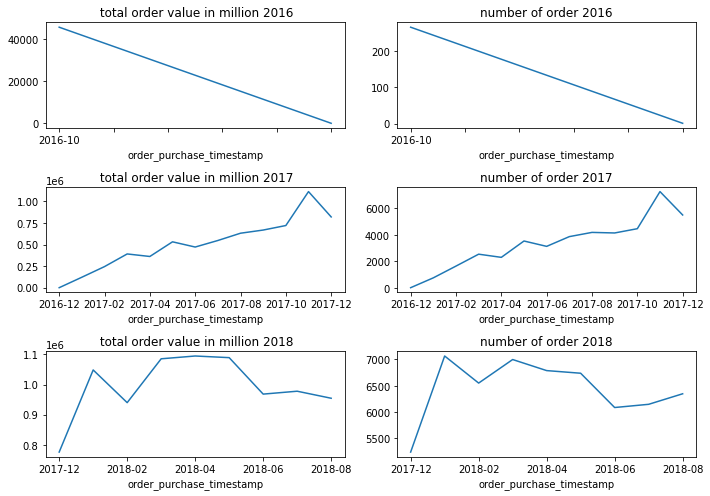

In [ ]:
fig, axes = plt.subplots(3, 2,figsize=(10,7))

df_group_month2016.plot(ax=axes.flatten()[0],grid=False)
df_group_month_order2016.plot(ax=axes.flatten()[1],grid=False)
axes.flatten()[0].set_title(' total order value in million 2016')
axes.flatten()[1].set_title('number of order 2016')

df_group_month2017.plot(ax=axes.flatten()[2],grid=False)
df_group_month_order2017.plot(ax=axes.flatten()[3],grid=False)
axes.flatten()[2].set_title(' total order value in million 2017')
axes.flatten()[3].set_title('number of order 2017')

df_group_month2018.plot(ax=axes.flatten()[4],grid=False)
df_group_month_order2018.plot(ax=axes.flatten()[5],grid=False)
axes.flatten()[4].set_title(' total order value in million 2018')
axes.flatten()[5].set_title('number of order 2018')

fig.tight_layout()
plt.show()

Though it was a bit weird, we almost could not see any seasonallity pattern throughout the year. This might be an indication that our sales didn't really rely on season.

In [ ]:
df_group_day = df_mix.groupby(df_mix['order_purchase_timestamp'].dt.strftime('%d'))['order_id'].count()

In [ ]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
week_df = df_mix.groupby(df_mix['order_purchase_timestamp'].dt.dayofweek)['order_id'].count()
week_df.index = list(days)
print (week_df)

week_df_pay = df_mix.groupby(df_mix['order_purchase_timestamp'].dt.dayofweek)['payment_value'].sum()
week_df_pay.index = list(days)
print (week_df_pay)

Monday       15681
Tuesday      15481
Wednesday    15054
Thursday     14302
Friday       13665
Saturday     10538
Sunday       11618
Name: order_id, dtype: int64
Monday       2449280.03
Tuesday      2381079.60
Wednesday    2297814.79
Thursday     2193672.82
Friday       2116290.32
Saturday     1647340.30
Sunday       1739991.62
Name: payment_value, dtype: float64


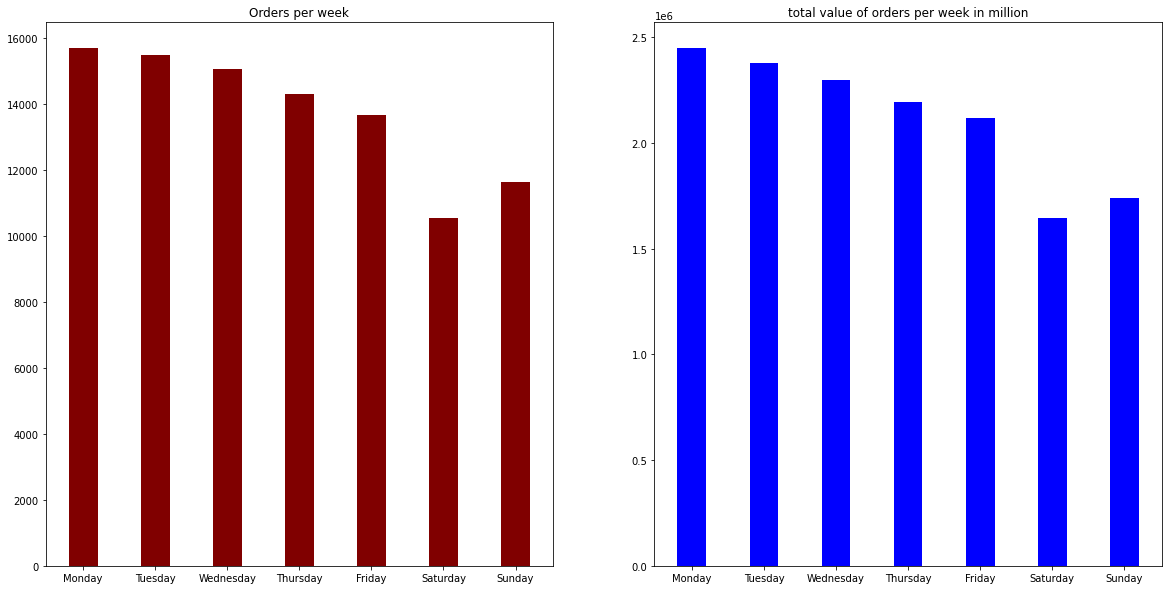

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2, figsize= (20,10))

 
axs[0].bar(days, week_df, color ='maroon', width = 0.4)
 
axs[0].set_title("Orders per week")

axs[1].bar(days,week_df_pay, color = 'blue', width = 0.4)

axs[1].set_title("total value of orders per week in million")
plt.show()



The amount of sales is at its peak at monday, and at its lowest point at saturday.

This might be because in saturday or sunday, people tend to go to the physical outlet as they have free times.

In [ ]:
df_group_payment = df_mix.groupby(df_mix['payment_type'])['order_id'].count()
df_group_payment

payment_type
boleto         19160
credit_card    73442
debit_card      1482
voucher         2255
Name: order_id, dtype: int64

In [ ]:
labels = 'boleto','credit card','debit card','voucher'
paytype = [ 19519,74817,1513,2323]

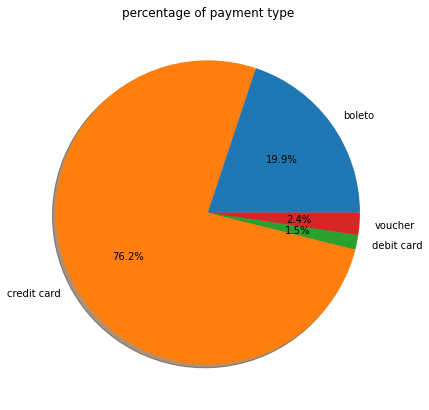

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.pie(paytype, labels=labels, autopct='%1.1f%%', shadow=True)
ax.set_title("percentage of payment type")
plt.show()

Credit cards are as usual the primadonna of online shopping

Data overview

There are 96336 user in the clean dataset

averagr income per order is 153.888 while average installments is 2.901

Most of our customers are from SP state

Our sales peak at monday, and is at its lowest at saturday

Credit cards are the most used payment methods

Insights

To boost our sales, we might consider two things. 

Find new customer base or to try and retain our customer base. From the data, we could see that a lot of our customers are from SP state. We might consider to centralized our promotion in that states, or if we want to try find new customer bases, we might go and find another states with close demographic to SP states.

Another thing that we might be able to consider is giving special promotion on weekends. People tend to play with their gadget most on weekend, so we might use this to increase or promotion on weekend to attract more customers.

Advance assignment

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [ ]:
### Get all the features columns with numerical data
numerical_column = ['payment_installments', 'payment_sequential', 'payment_value']
df_clust = df_mix[['customer_state',"payment_type",'payment_sequential',	'payment_installments',	'payment_value']]
df_clust2 = pd.get_dummies(df_clust, columns=["payment_type"], prefix=["payment_type"])
df_cluster= pd.get_dummies(df_clust2, columns=["customer_state"], prefix=["customer_state"])
df_cluster


,payment_sequential,payment_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,customer_state_AC,customer_state_AL,customer_state_AM,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,3,1,2.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,141.46,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,179.12,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,72.20,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,28.62,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96334,1,3,85.08,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96335,1,3,195.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96336,1,5,271.01,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96337,1,4,441.16,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
scaler = MinMaxScaler()
df_cluster[numerical_column] = scaler.fit_transform(df_cluster[numerical_column])
df_cluster

,payment_sequential,payment_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,customer_state_AC,customer_state_AL,customer_state_AM,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,0.111111,0.000000,0.000619,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.000000,0.000000,0.051670,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.086957,0.065456,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.000000,0.026316,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.000000,0.000000,0.010363,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96334,0.000000,0.086957,0.031031,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96335,0.000000,0.086957,0.071269,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96336,0.000000,0.173913,0.099094,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96337,0.000000,0.130435,0.161380,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


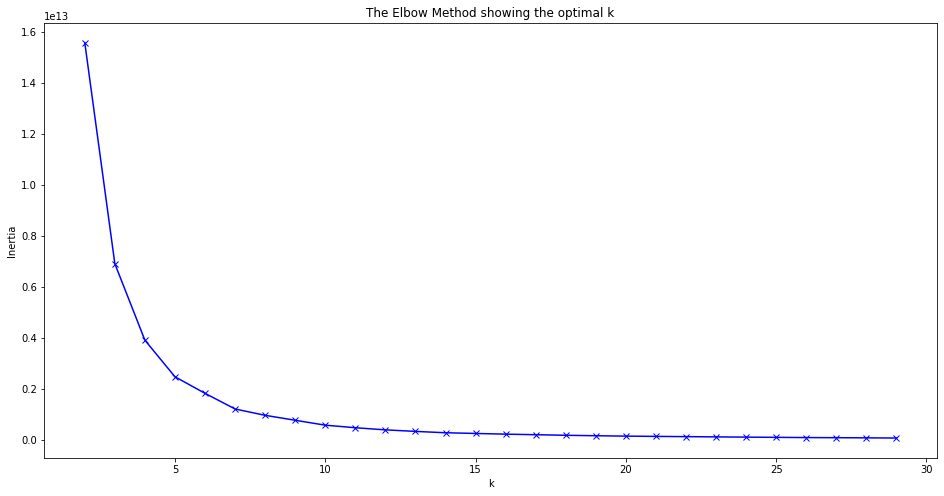

In [ ]:
distortions = []
K = range(2,30)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
!gdown https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l

Downloading...
From: https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 5.04MB/s]


In [ ]:
from silhoutte import silhoutte_analysis

For n_clusters = 2 The average silhouette_score is : 0.7356649089452613
For n_clusters = 3 The average silhouette_score is : 0.6407731304123366
For n_clusters = 4 The average silhouette_score is : 0.6269040836334812
For n_clusters = 5 The average silhouette_score is : 0.6085204479192754
For n_clusters = 6 The average silhouette_score is : 0.5817905527327187
For n_clusters = 7 The average silhouette_score is : 0.6006162392698774


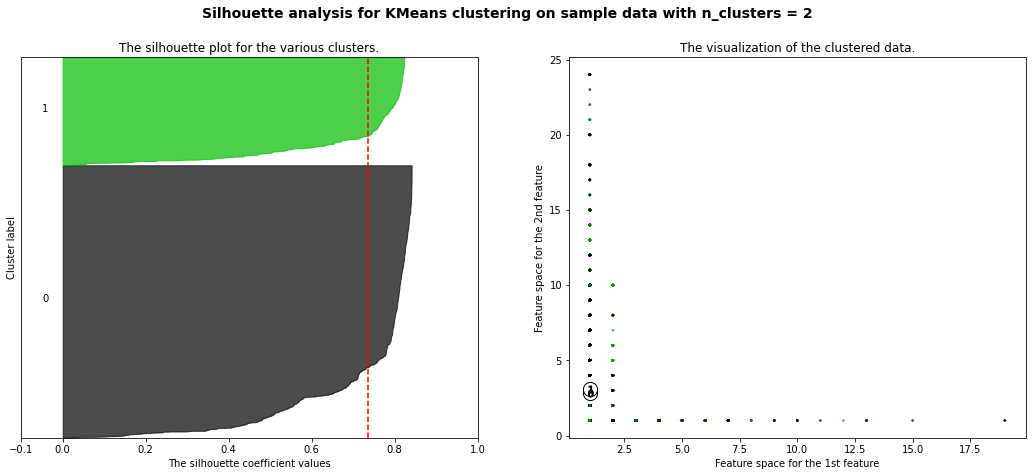

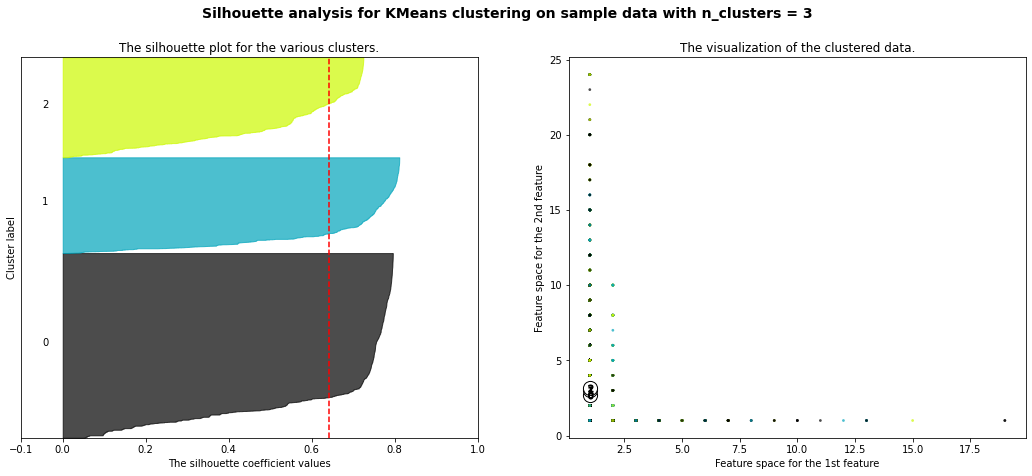

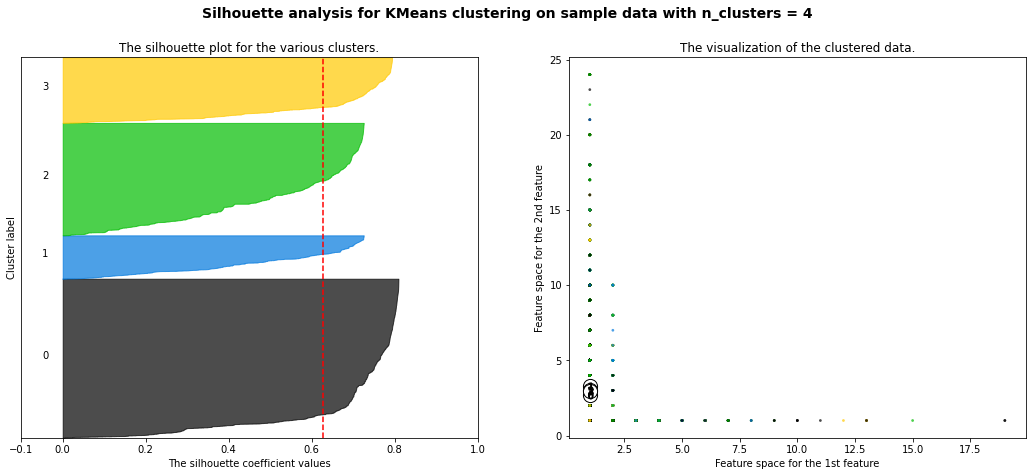

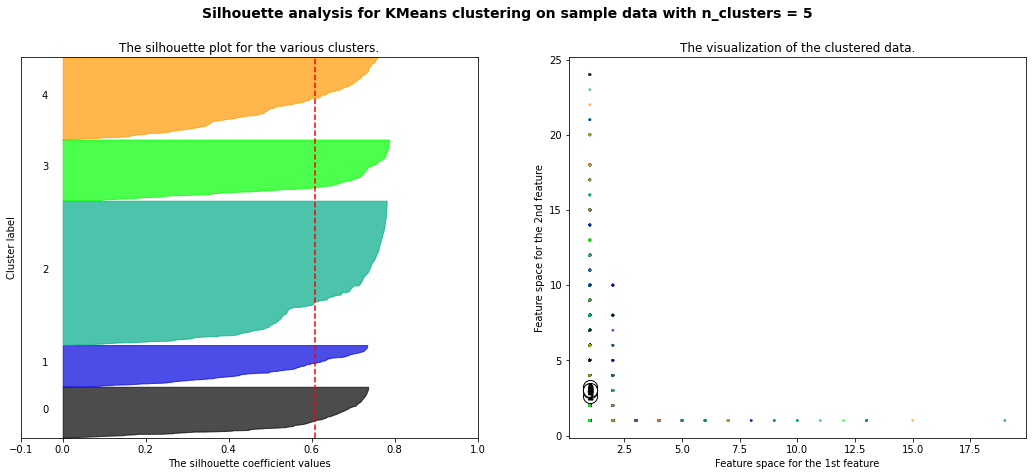

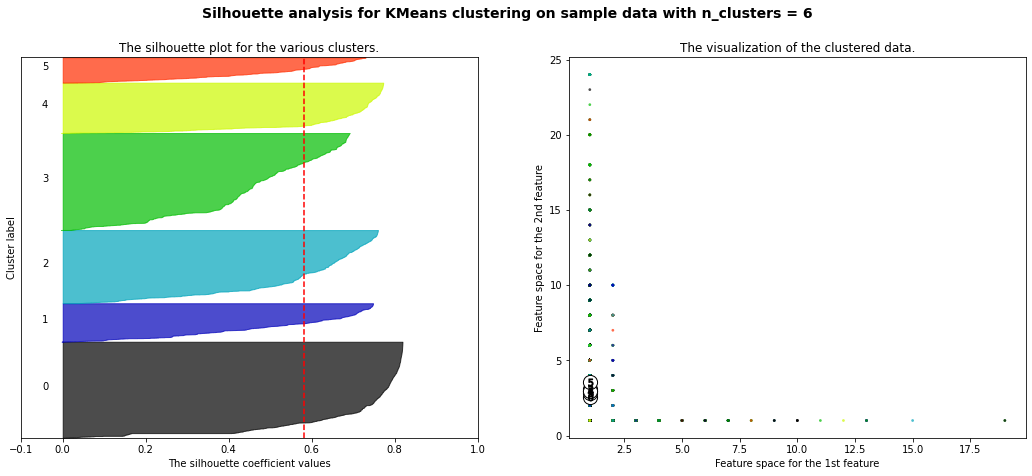

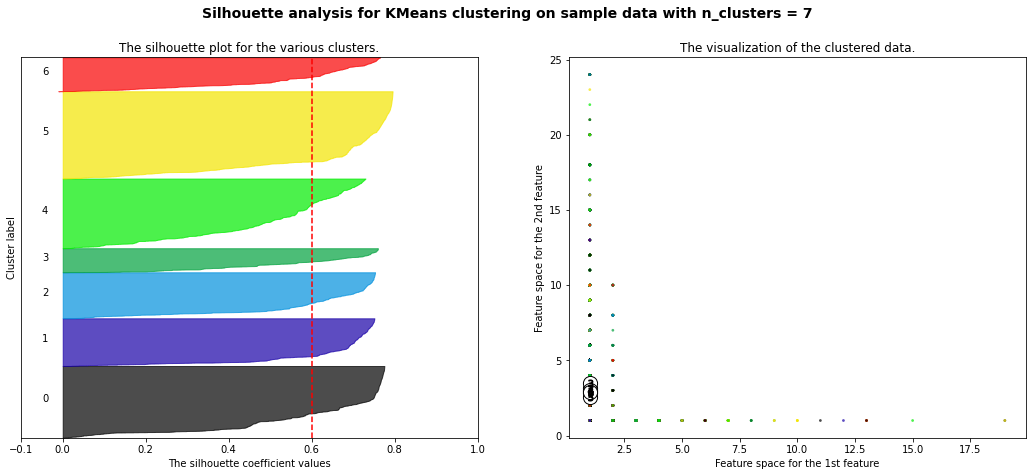

In [ ]:
silhoutte_analysis(df_cluster,list(range(2,30)))

Using silhouette analysis, we found the best cluster equal to 6.
But it might also be a good idea to try at number of cluster = 7.

In [ ]:
cluster_model = cluster.KMeans(n_clusters=7, random_state=3)
cluster_label = cluster_model.fit_predict(df_cluster)
df_mix['cluster'] = cluster_label
df_mix

,order_id,customer_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,cluster
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,1,credit_card,1,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,1,credit_card,1,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96334,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,0
96335,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,1,credit_card,3,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,0
96336,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,5
96337,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2


In [ ]:
df_mix.groupby(['cluster','customer_state'])['payment_value'].agg(['count','mean','median','max','min']).head(200)

count        mean   median      max    min
cluster customer_state                                            
0       SP              30829  143.268368   95.300  2681.29   0.31
1       AC                 21  209.711905  130.850   905.93  11.58
        AL                 71  199.812113  131.470  2269.98  20.00
        AM                 26  178.195769  105.140   638.66   0.66
        AP                 20  188.825500  144.760   657.61  34.80
        BA                742  139.685957   97.585  2111.57   1.41
        CE                249  165.049719   99.950  1463.37   0.56
        DF                443  128.461106   88.490  1839.05   2.16
        ES                477  124.345073   87.230  1353.28   0.65
        GO                502  138.218606   98.195  2220.32   1.05
        MA                210  181.723667  119.500  1680.25   2.27
        MG               2240  142.617237   97.220  2027.65  18.56
        MS                202  147.784851  107.080  1626.65   1.97
        MT                247  161.390567  108.550  1927.38  12.82
        PA                245  194.886816  117.930  1301.01   3.43
        PB                119  221.595378  144.560  2155.35   1.21
        PE                332  153.143343   93.350  2017.08   0.52
        PI                114  162.965702  112.130  1205.00   3.35
        PR               1271  134.019024   86.860  2713.36   0.33
        RJ               2078  146.775332   99.335  2315.83  19.55
        RN                 99  186.527778  116.760  1351.03  15.05
        RO                 67  215.666418  147.130  1391.39   3.29
        RR                 12  222.993333   80.160   730.95  47.92
        RS               1326  138.862994   96.535  2096.14  19.48
        SC                934  129.616552   86.065  2713.36   0.34
        SE                 88  178.426023  117.445  1480.73  28.70
        TO                 86  169.422791  119.410  1237.81  14.10
2       RJ              10251  161.898518  111.650  2621.29   0.38
3       SP               9618  121.724255   78.940  2512.53   0.37
4       MG               9096  156.888708  107.780  2627.09   0.34
5       AC                 59  245.484237  198.460  1251.70  43.34
        AL                326  238.572025  140.610  1942.00   1.33
        AM                119  189.392773  124.330  1853.75  29.65
        AP                 47  259.553617  146.200  1482.42  42.10
        BA               2507  181.716625  119.940  2732.06   0.39
        CE               1028  206.885039  134.335  2223.12   0.52
        DF               1634  165.350545  112.970  2616.00   0.67
        ES               1514  157.140509  112.585  1814.29   0.58
        GO               1453  174.987901  114.690  2267.28   2.93
        MA                505  205.358099  138.150  2338.48   5.25
        MS                497  185.657183  117.430  2133.69   1.74
        MT                638  212.491379  135.450  2487.24   1.23
        PA                700  222.871700  143.180  2252.66   2.31
        PB                395  240.010329  151.610  2438.51   7.52
        PE               1259  193.728912  138.870  2067.42   0.80
        PI                362  226.760580  154.600  1989.75   4.31
        PR               3646  161.692090  107.165  2389.78   0.81
        RN                375  209.411120  142.330  1821.82   5.43
        RO                176  237.291875  157.475  2452.12   8.45
        RR                 29  219.434483  162.790   994.77  39.03
        SC               2607  170.409241  116.360  2647.76   0.36
        SE                247  212.858745  137.940  1729.98   0.39
        TO                187  219.117594  142.970  2094.44   1.93
6       RS               4014  163.593433  108.545  2455.12   0.34

In [ ]:
df_mix.groupby(['cluster','customer_state'])['payment_installments'].agg(['count','mean','median']).head(200)

count      mean  median
cluster customer_state                         
0       SP              30829  3.185085     2.0
1       AC                 21  1.000000     1.0
        AL                 71  1.000000     1.0
        AM                 26  1.000000     1.0
        AP                 20  1.000000     1.0
        BA                742  1.000000     1.0
        CE                249  1.000000     1.0
        DF                443  1.000000     1.0
        ES                477  1.000000     1.0
        GO                502  1.000000     1.0
        MA                210  1.000000     1.0
        MG               2240  1.000000     1.0
        MS                202  1.000000     1.0
        MT                247  1.000000     1.0
        PA                245  1.000000     1.0
        PB                119  1.000000     1.0
        PE                332  1.000000     1.0
        PI                114  1.000000     1.0
        PR               1271  1.000000     1.0
        RJ               2078  1.000000     1.0
        RN                 99  1.000000     1.0
        RO                 67  1.000000     1.0
        RR                 12  1.000000     1.0
        RS               1326  1.000000     1.0
        SC                934  1.000000     1.0
        SE                 88  1.000000     1.0
        TO                 86  1.000000     1.0
2       RJ              10251  3.446005     2.0
3       SP               9618  1.000000     1.0
4       MG               9096  3.517370     3.0
5       AC                 59  4.610169     4.0
        AL                326  4.426380     4.0
        AM                119  3.840336     3.0
        AP                 47  3.404255     3.0
        BA               2507  3.962904     3.0
        CE               1028  4.142996     3.0
        DF               1634  3.199510     2.0
        ES               1514  3.659841     3.0
        GO               1453  3.699243     3.0
        MA                505  4.013861     3.0
        MS                497  3.686117     3.0
        MT                638  3.934169     3.0
        PA                700  4.085714     3.0
        PB                395  4.686076     4.0
        PE               1259  4.204130     3.0
        PI                362  4.232044     3.0
        PR               3646  3.572134     3.0
        RN                375  4.381333     4.0
        RO                176  4.517045     4.0
        RR                 29  3.586207     3.0
        SC               2607  3.571922     3.0
        SE                247  4.587045     4.0
        TO                187  4.000000     3.0
6       RS               4014  3.687344     3.0

In [ ]:
df_mix.groupby(['cluster'])['payment_value'].agg(['count','mean','median','sum']).head(125)

,count,mean,median,sum
cluster,,,,
0,30829,143.268368,95.300,4416820.51
1,12221,145.211173,97.650,1774625.75
2,10251,161.898518,111.650,1659621.71
3,9618,121.724255,78.940,1170743.88
4,9096,156.888708,107.780,1427059.69
5,20310,183.157750,120.835,3719933.90
6,4014,163.593433,108.545,656664.04


The clusters are mostly sepparated by state with only a few exceptions like cluster 0 and cluster 5.

Cluster 0 had the most order and also spent the most. It could be seen that the state SP had the most sales among any other state

cluster 3 cluster 5 had the most order and also spent the most after cluster 0.

The top two states contributor are rj and sp.

Cluster 1 and 4 are customers with high payment installments but also the least sales amongst any other cluster

Cluster 2 and Cluster 6 had similar sales demographic but they differed in states.

Cluster 6 are like in the middle of the other clusters




